In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
# loading out dataset from previous notebook
urldata = pd.read_csv("/content/drive/MyDrive/final project/sub_dataset.csv")

In [ ]:
urldata

,length_url,qty_dot_url,qty_hyphen_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,email_in_url,domain_length,domain_in_ip,...,file_length,qty_dot_file,qty_hyphen_file,params_length,qty_params,url_google_index,tls_ssl_certificate,qty_redirects,url_shortened,phishing
0,25,3,0,1,0,0,0,0,17,0,...,7,1,0,-1,-1,0,0,0,0,1
1,223,5,0,3,0,3,0,0,16,0,...,9,1,0,165,3,0,1,0,0,1
2,15,2,0,1,0,0,0,0,14,0,...,0,0,0,-1,-1,0,1,0,0,0
3,81,4,0,5,0,0,0,0,19,0,...,9,1,0,-1,-1,0,1,0,0,1
4,19,2,0,0,0,0,0,0,19,0,...,-1,-1,-1,-1,-1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,23,3,1,0,0,0,0,0,23,0,...,-1,-1,-1,-1,-1,0,0,0,0,0
88643,34,2,0,0,0,0,0,0,34,0,...,-1,-1,-1,-1,-1,0,0,2,0,0
88644,70,2,1,5,0,0,0,0,22,0,...,11,1,0,-1,-1,0,1,0,0,1
88645,28,2,0,1,0,0,0,0,27,0,...,0,0,0,-1,-1,0,1,0,0,1


Data visualization

In [ ]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   length_url            88647 non-null  int64
 1   qty_dot_url           88647 non-null  int64
 2   qty_hyphen_url        88647 non-null  int64
 3   qty_slash_url         88647 non-null  int64
 4   qty_questionmark_url  88647 non-null  int64
 5   qty_equal_url         88647 non-null  int64
 6   qty_at_url            88647 non-null  int64
 7   email_in_url          88647 non-null  int64
 8   domain_length         88647 non-null  int64
 9   domain_in_ip          88647 non-null  int64
 10  qty_dot_domain        88647 non-null  int64
 11  qty_hyphen_domain     88647 non-null  int64
 12  directory_length      88647 non-null  int64
 13  qty_slash_directory   88647 non-null  int64
 14  file_length           88647 non-null  int64
 15  qty_dot_file          88647 non-null  int64
 16  qty_

phishing
0    58000
1    30647
Name: count, dtype: int64


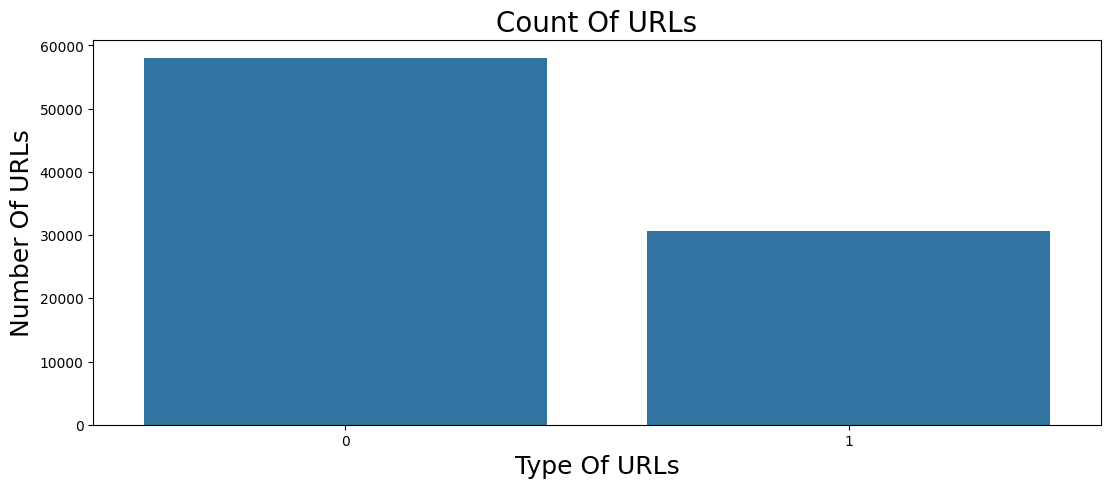

In [ ]:
# Lets find how many malicious and non-malicious samples we have
i = urldata["phishing"].value_counts()
print(i)

plt.figure(figsize=(13,5))
sns.countplot(x='phishing',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.show()

<Axes: >

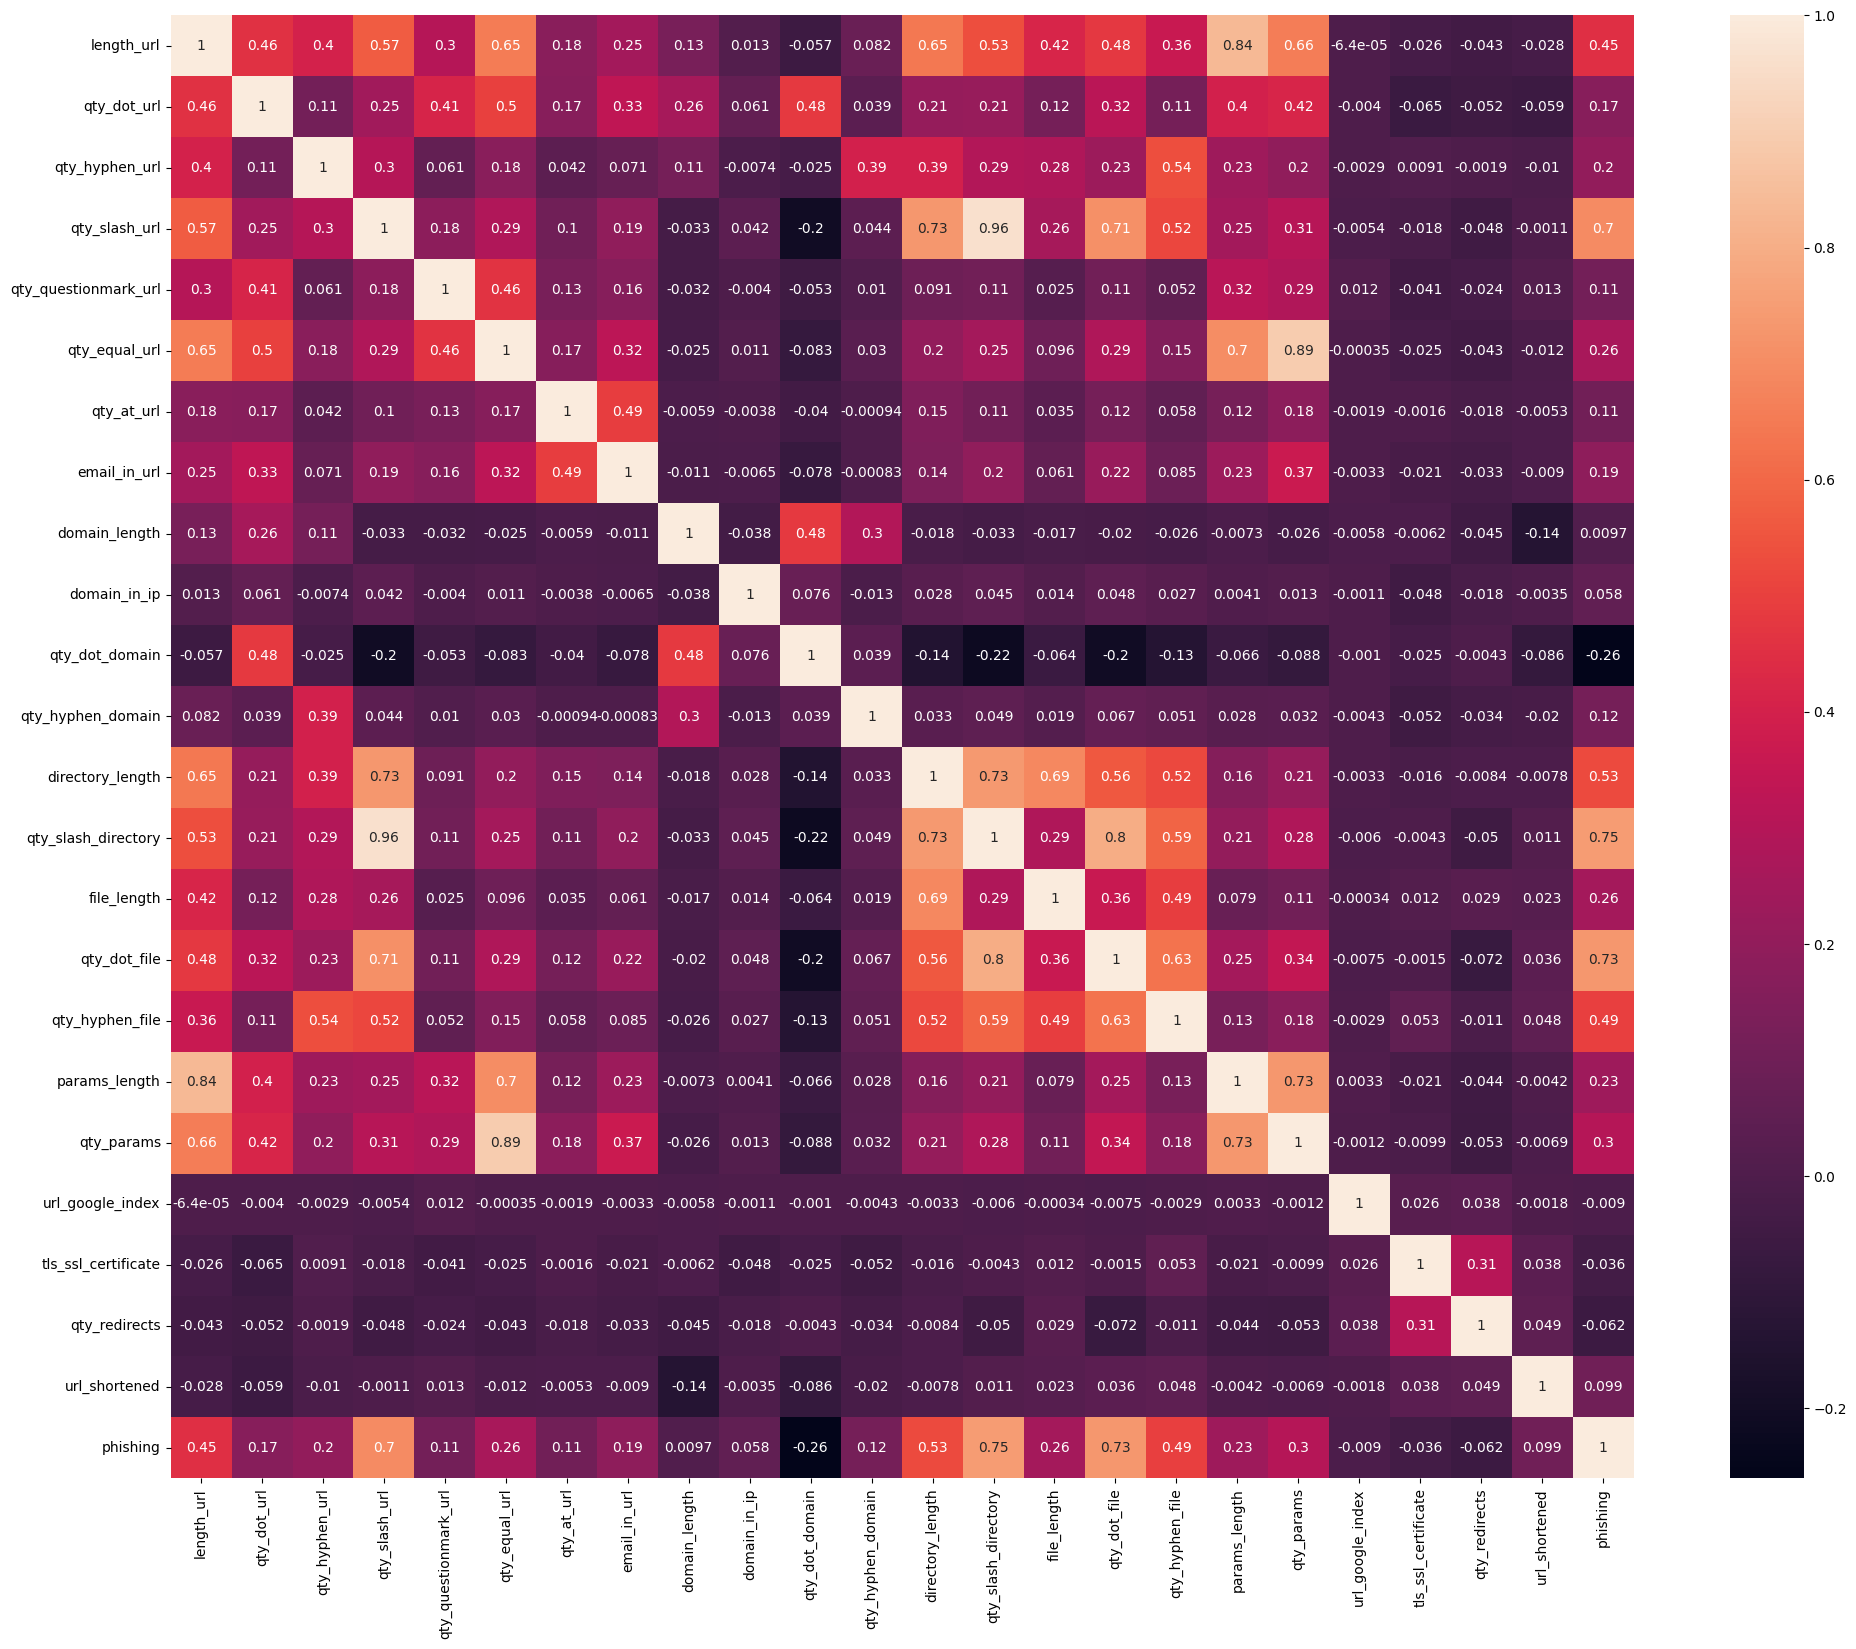

In [ ]:
#Correlation Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

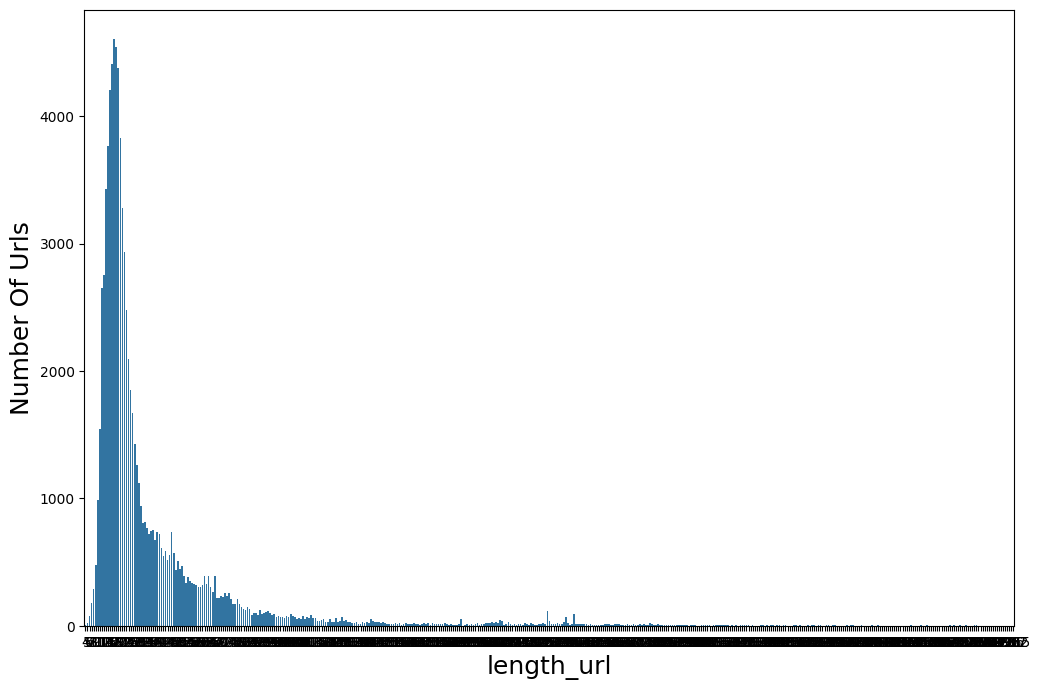

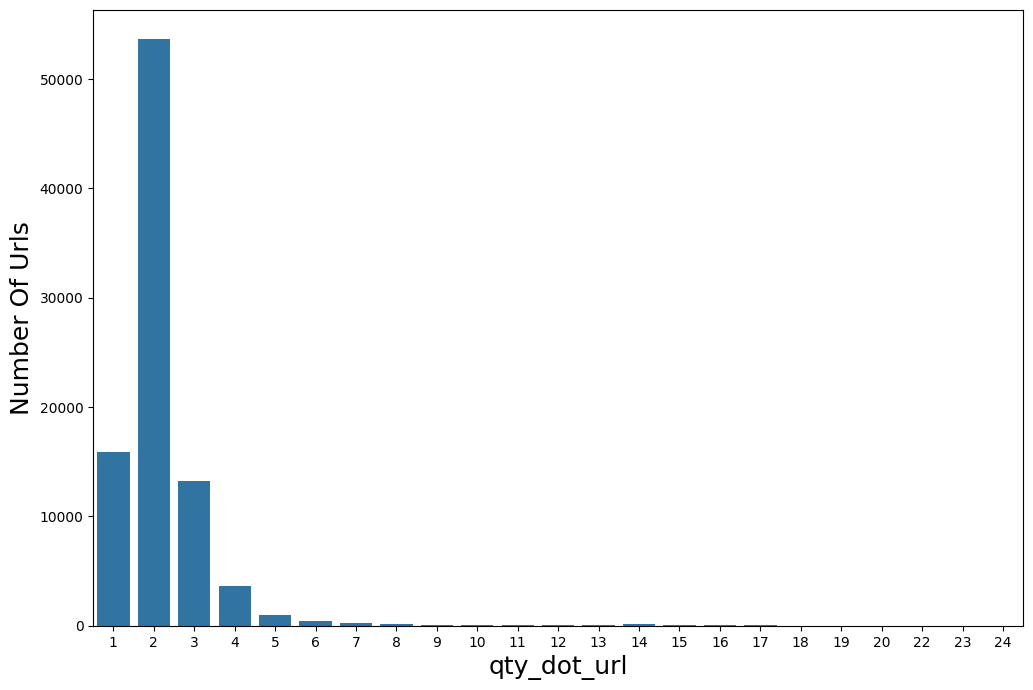

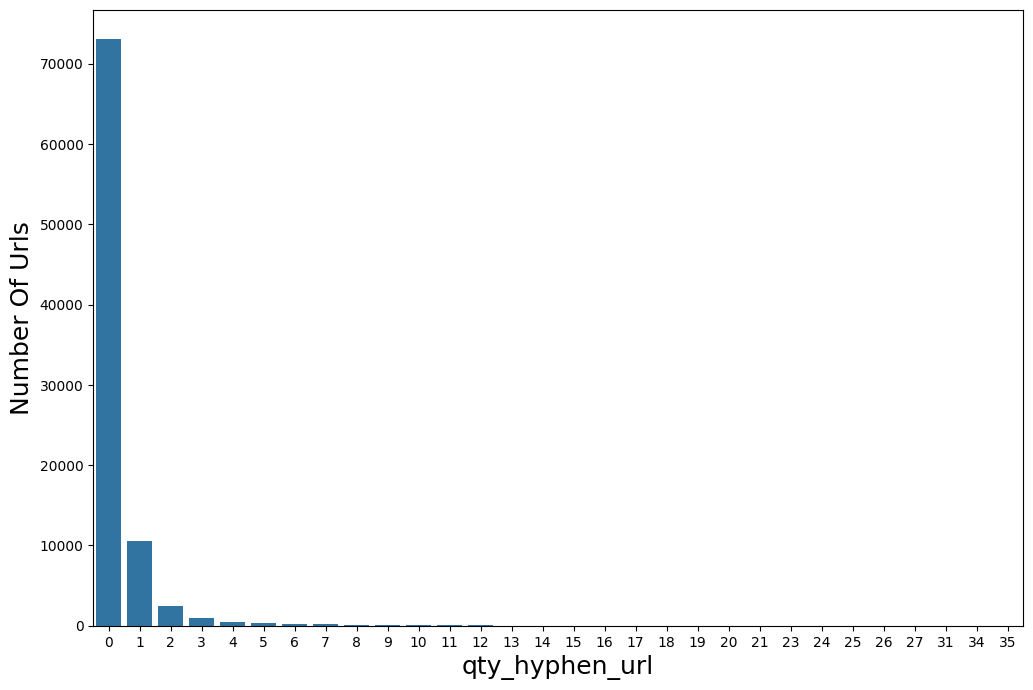

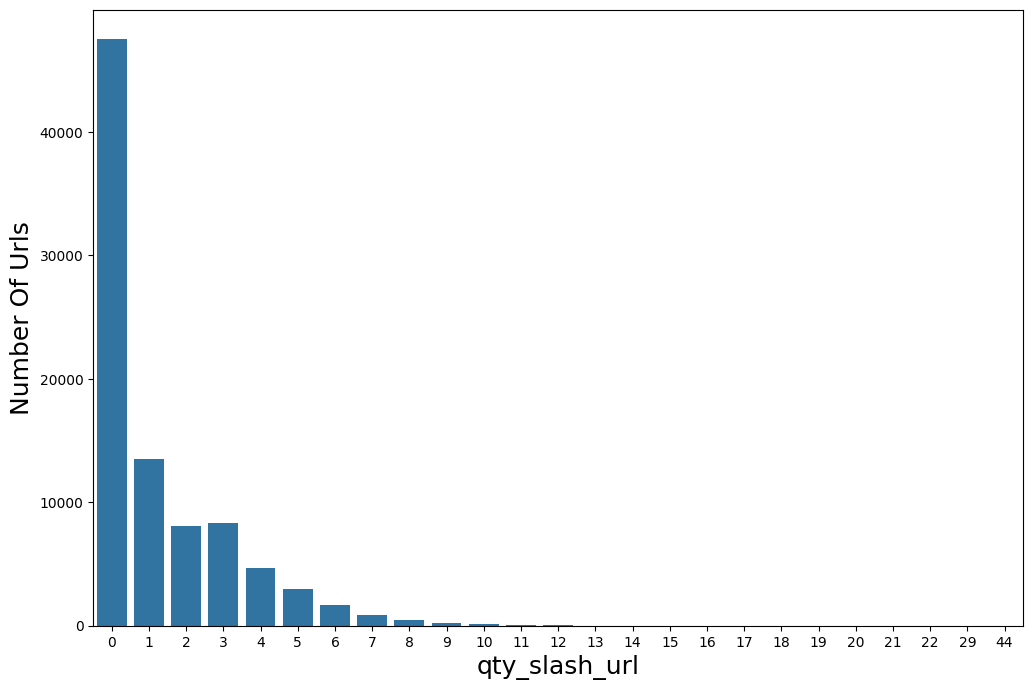

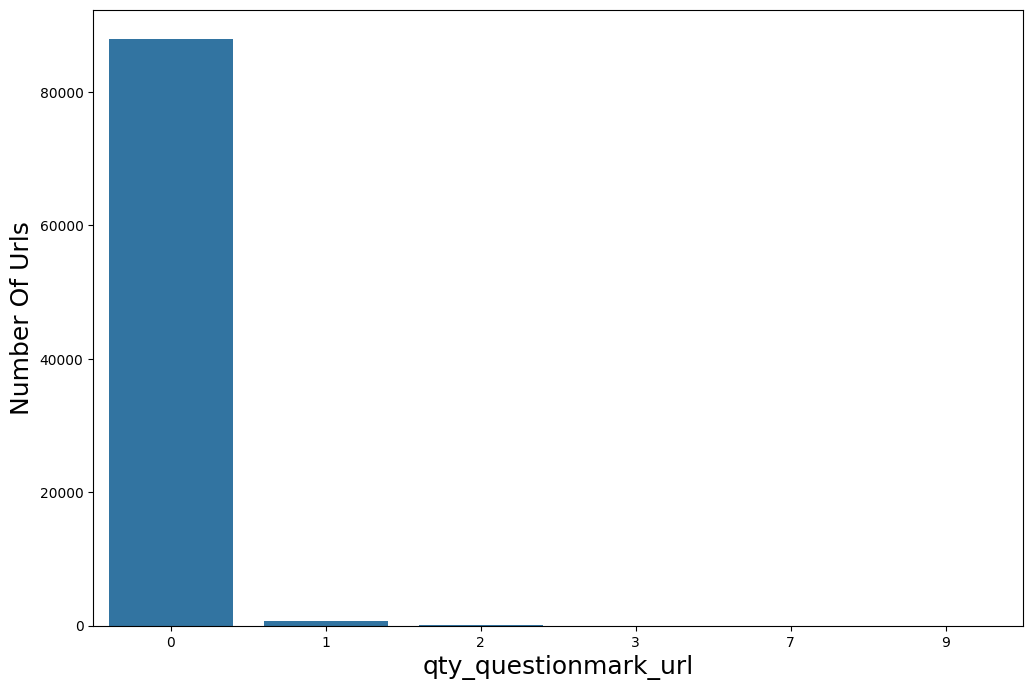

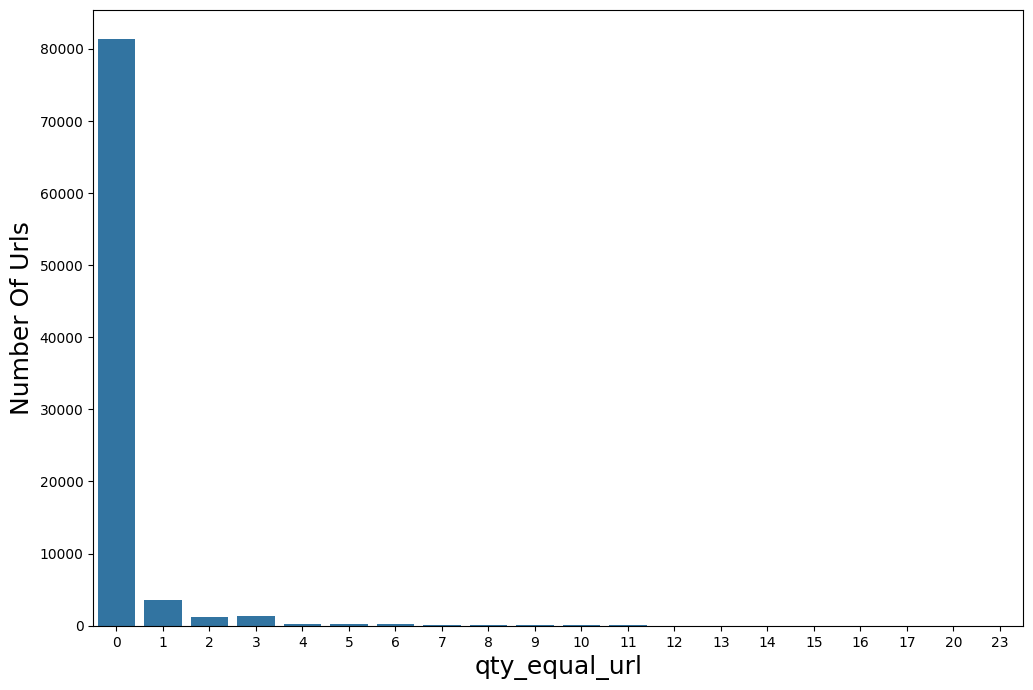

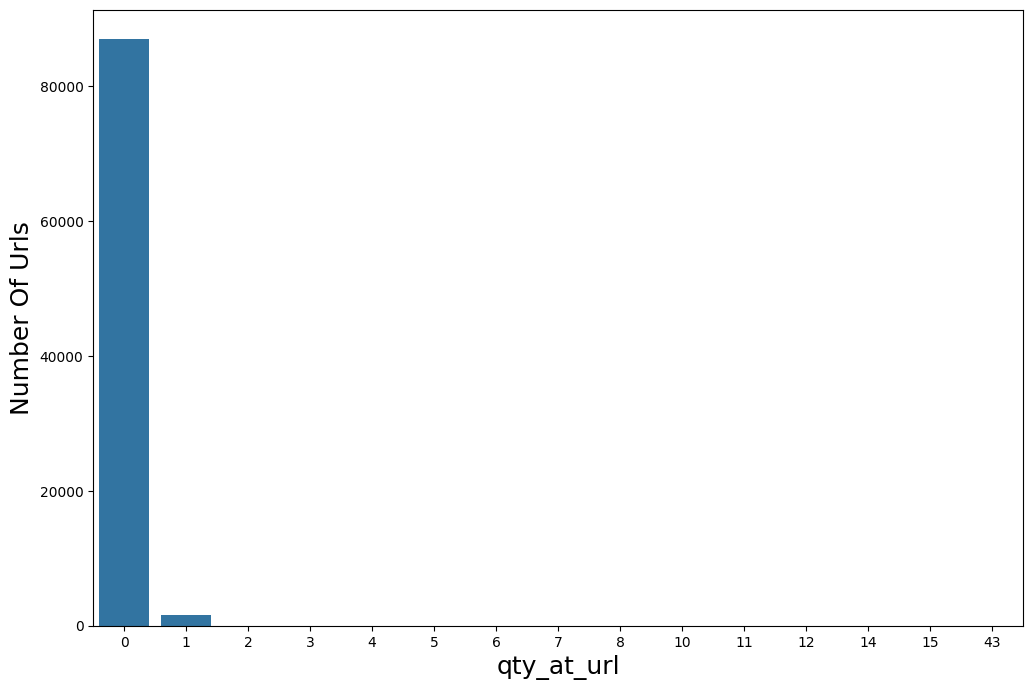

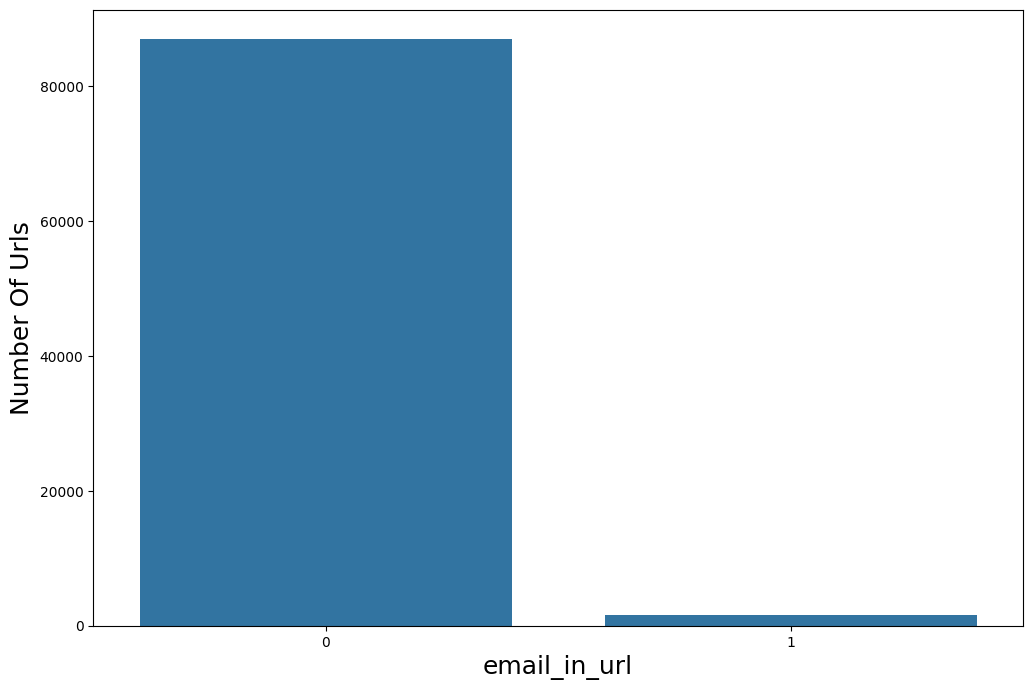

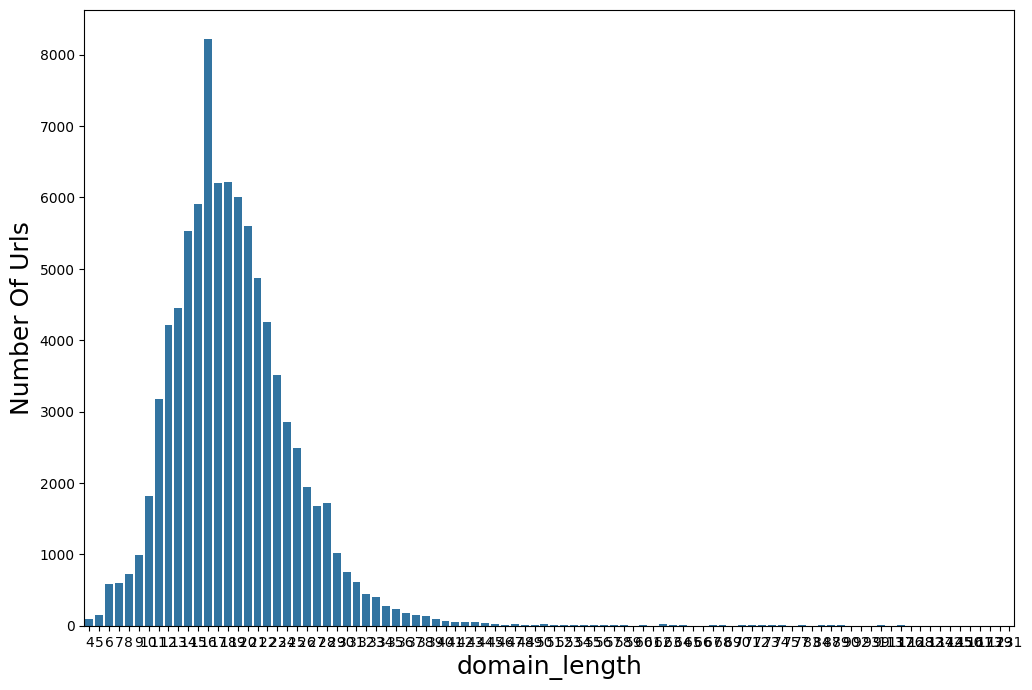

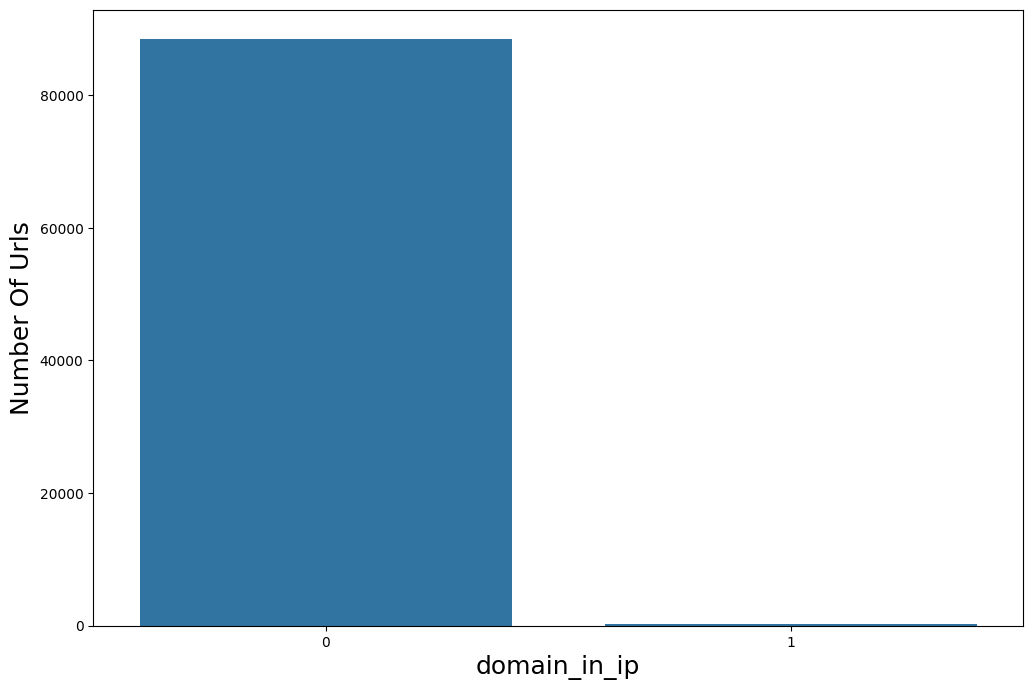

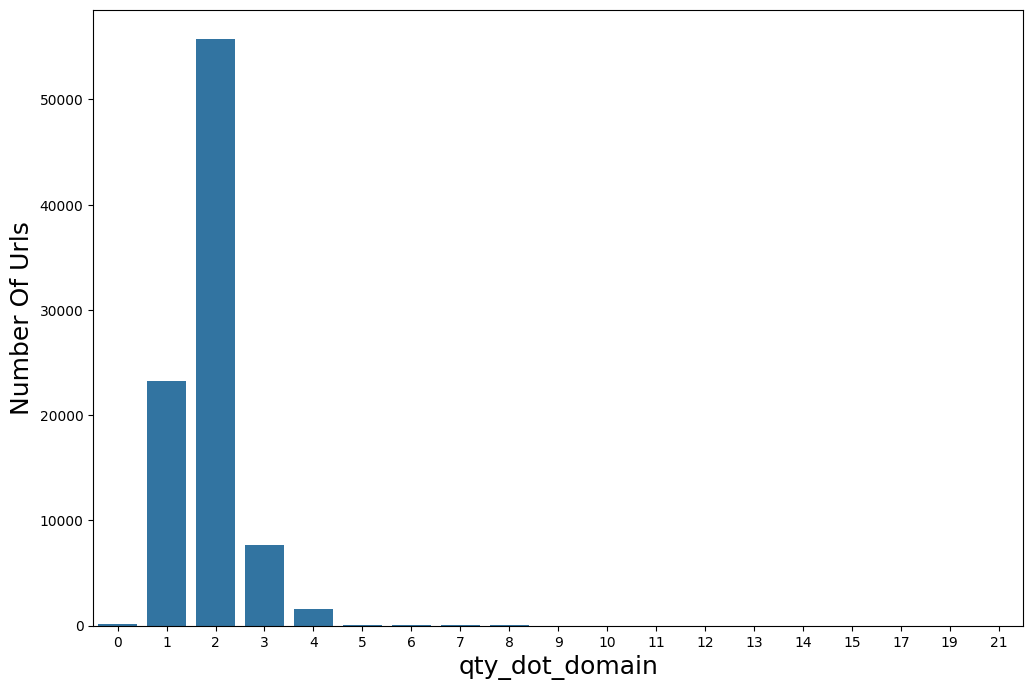

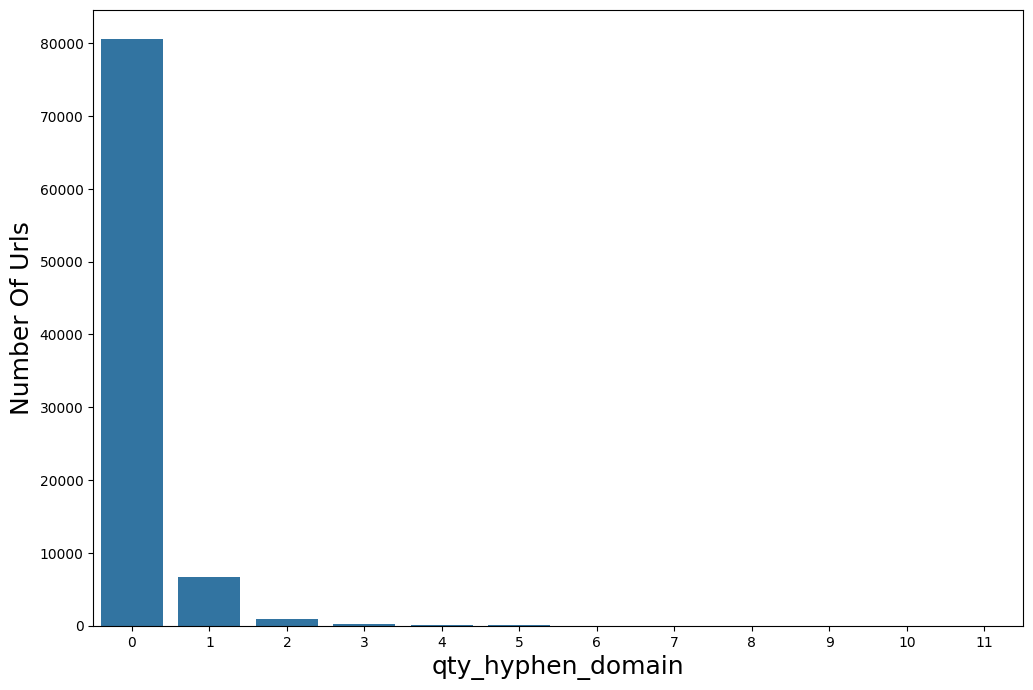

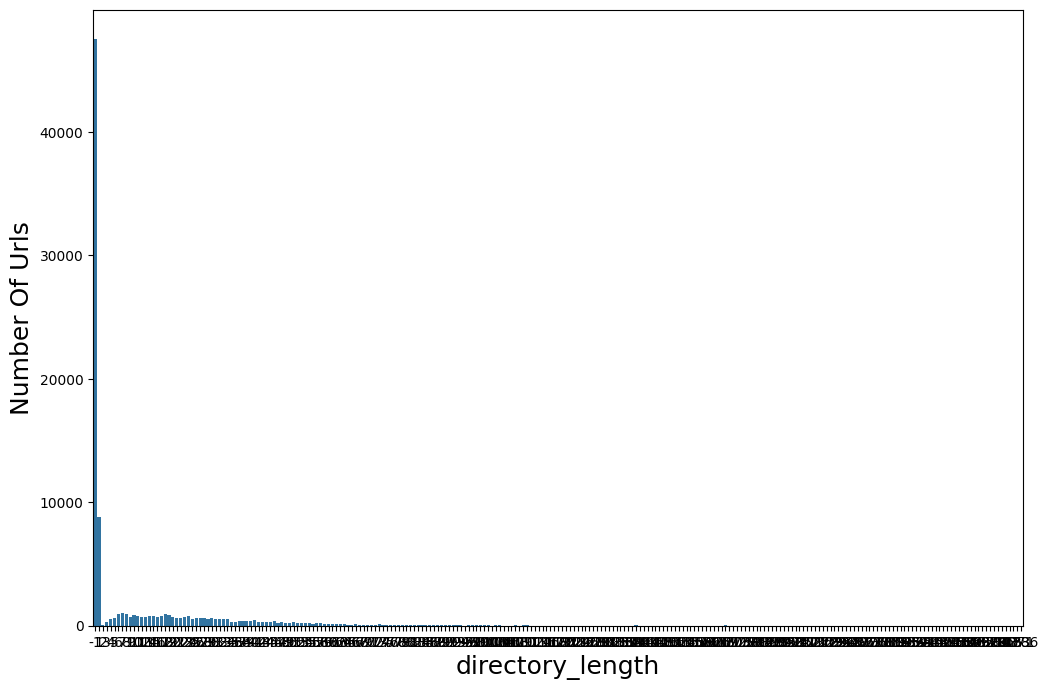

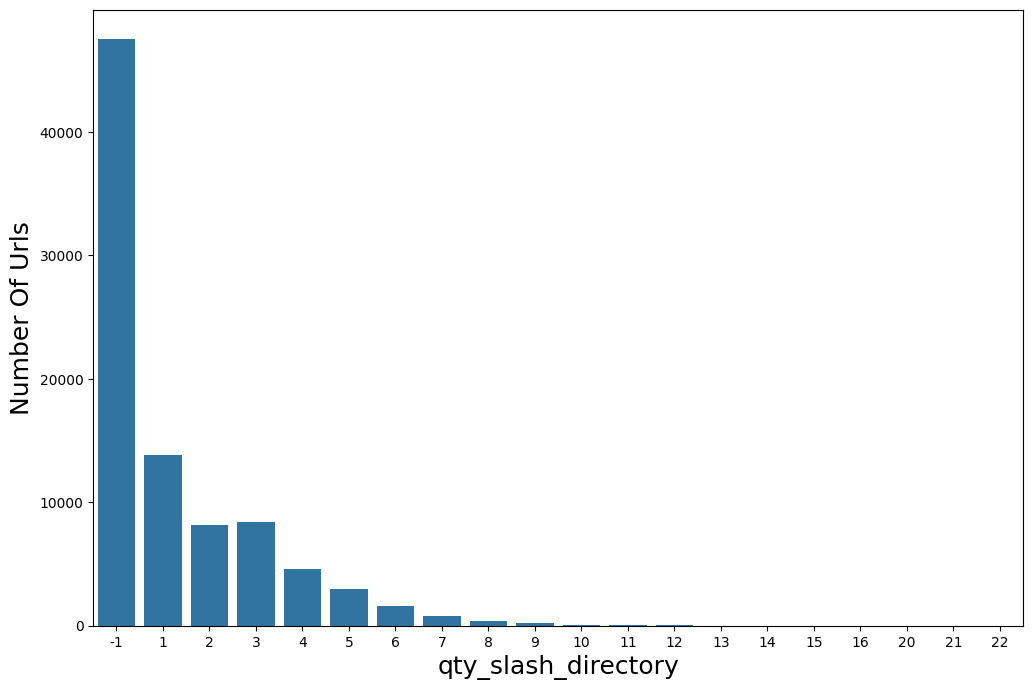

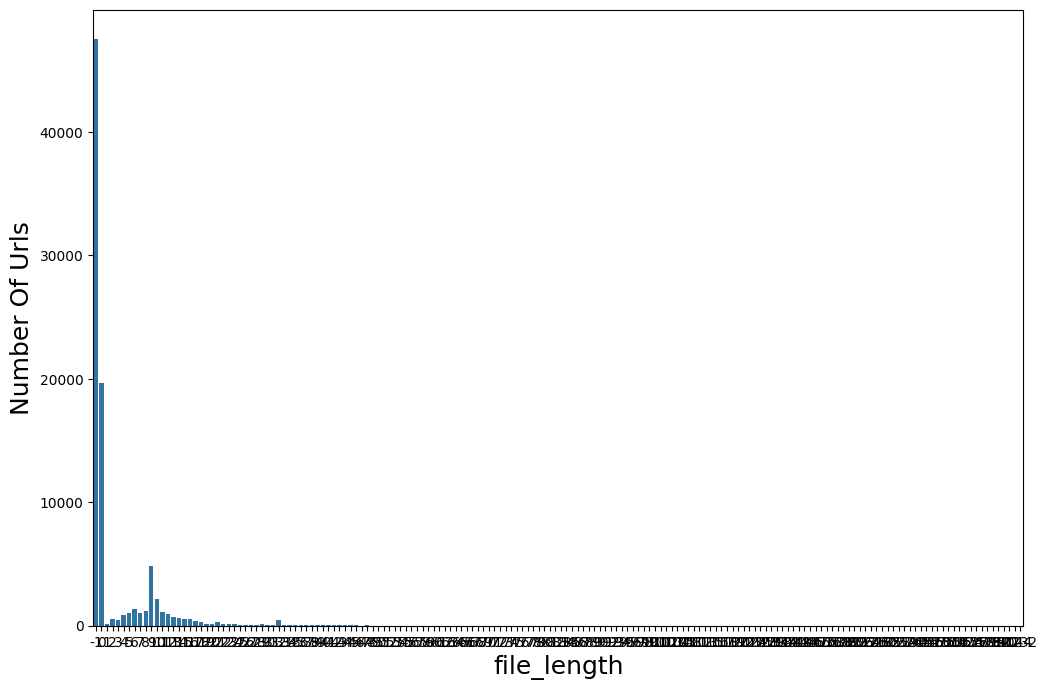

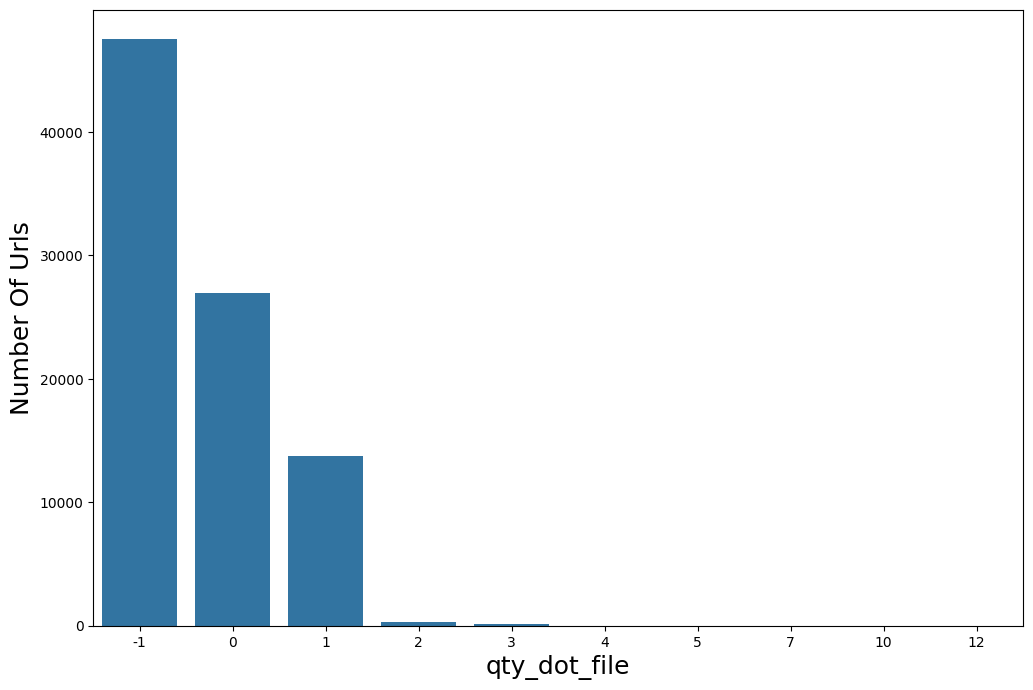

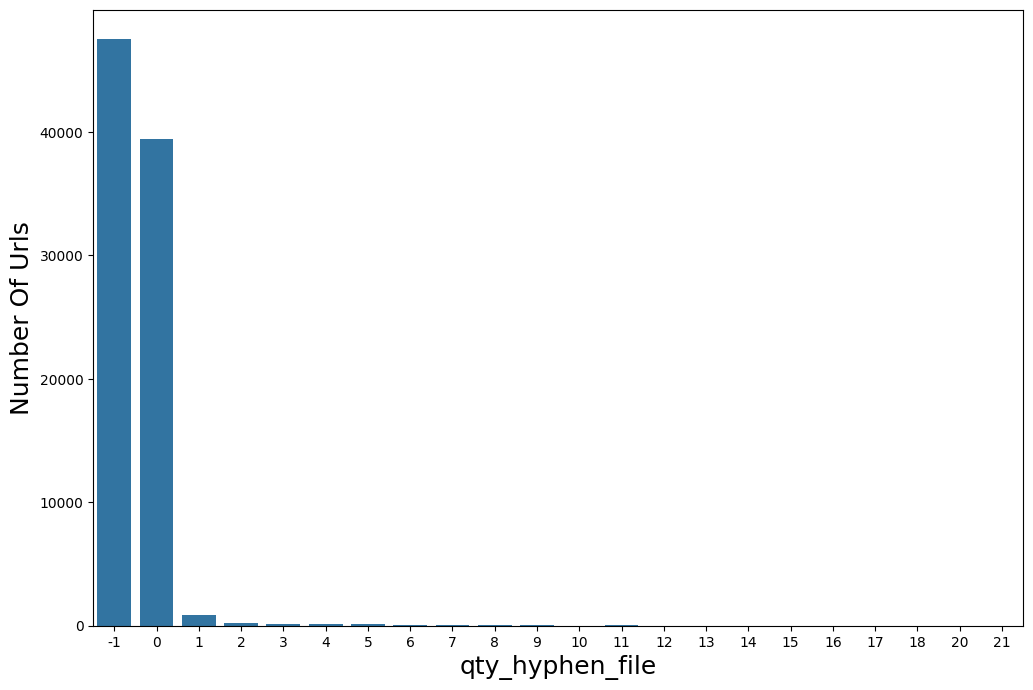

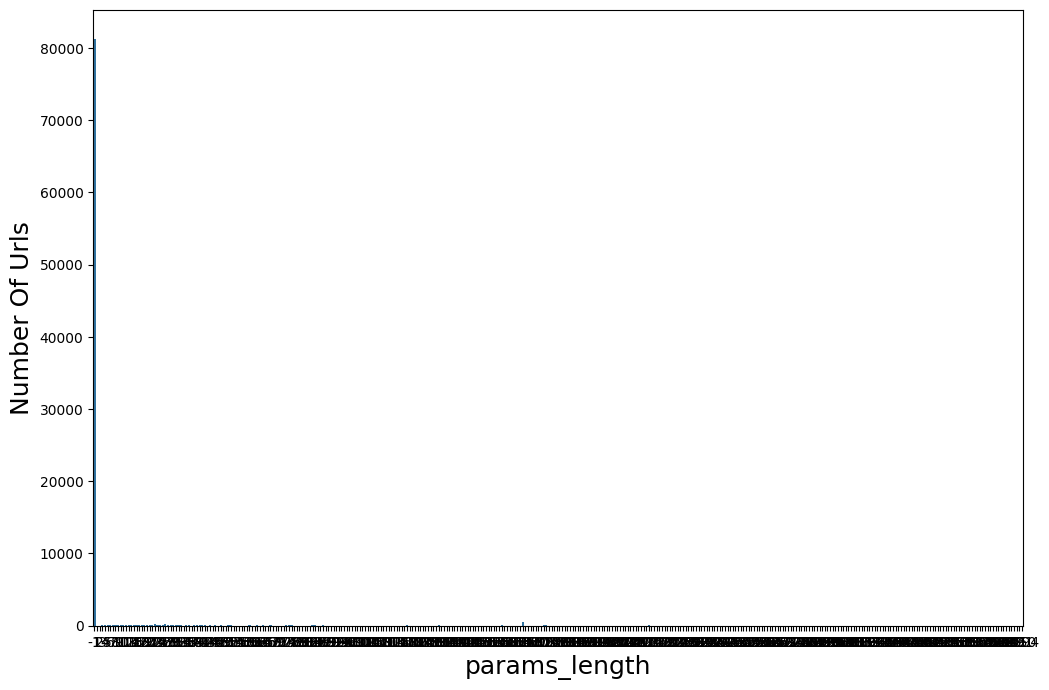

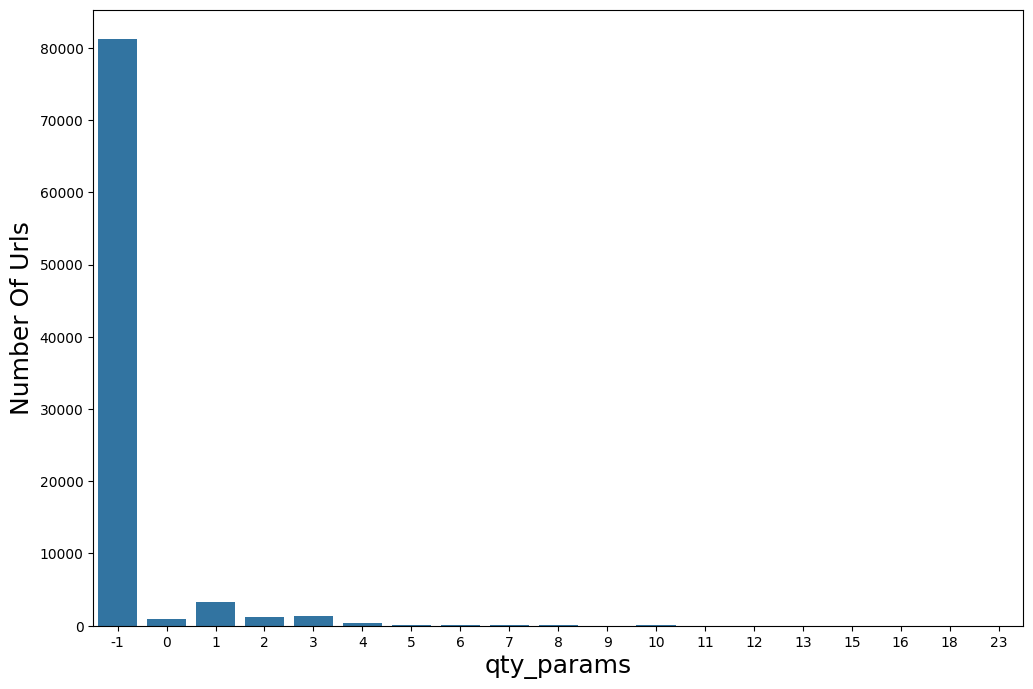

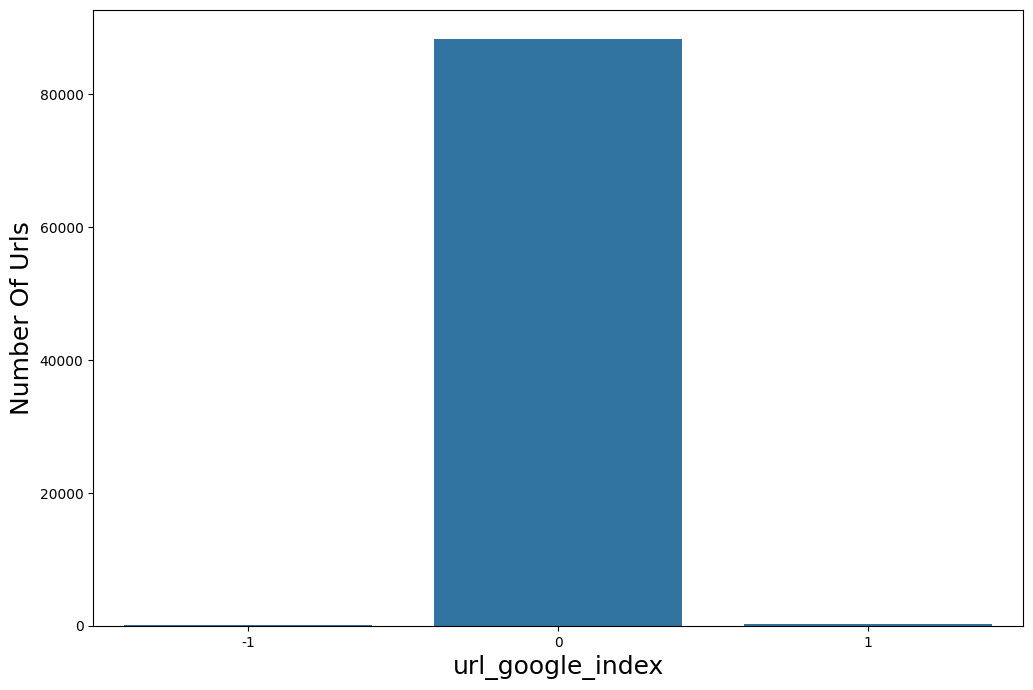

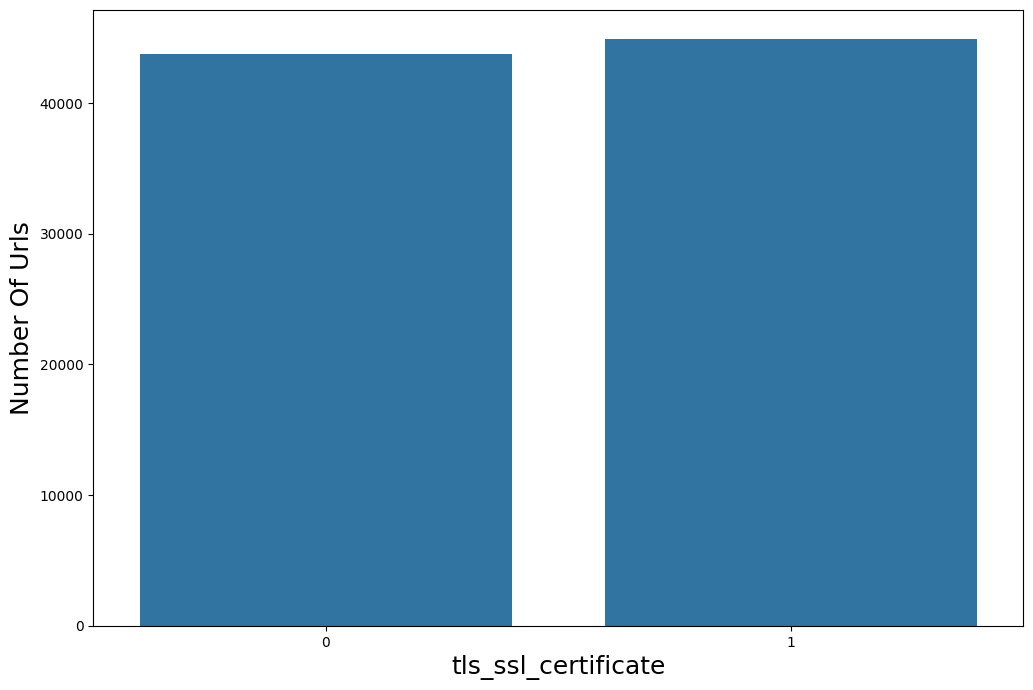

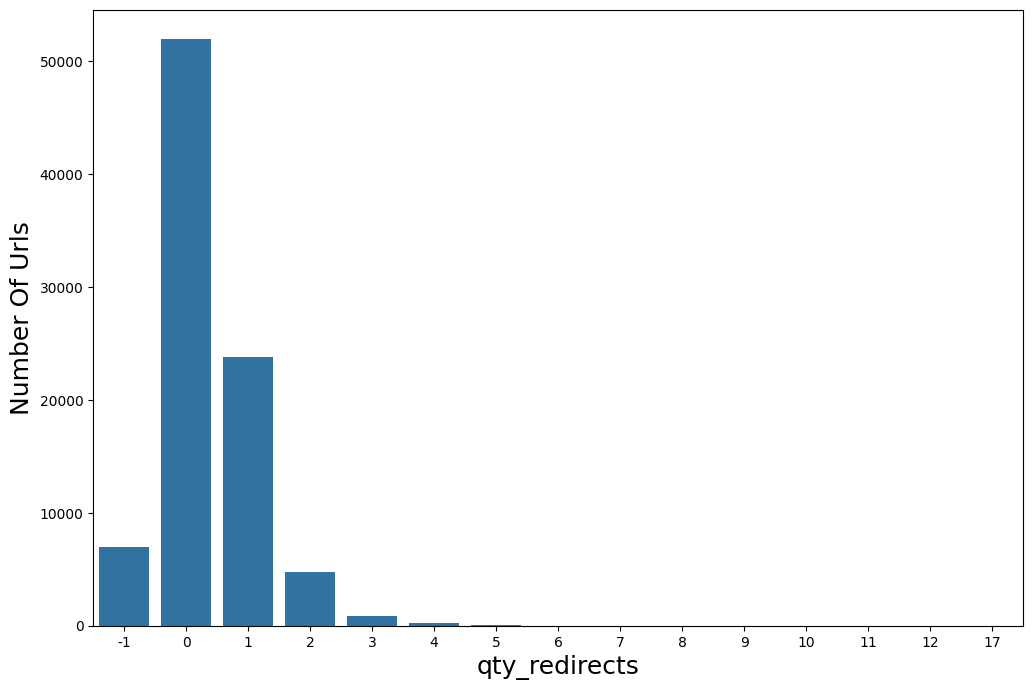

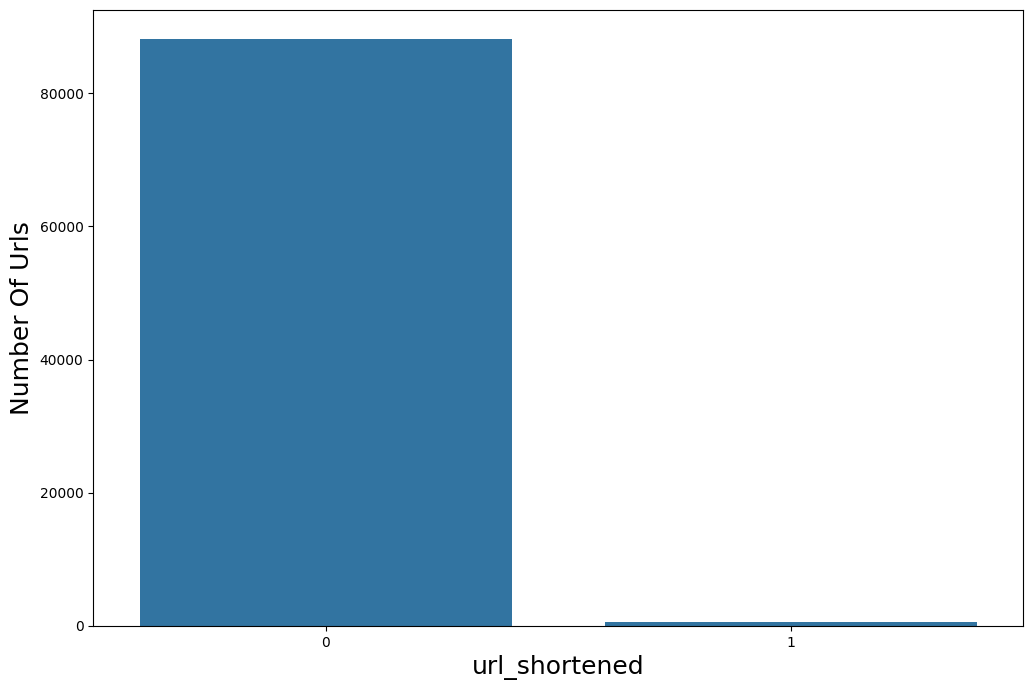

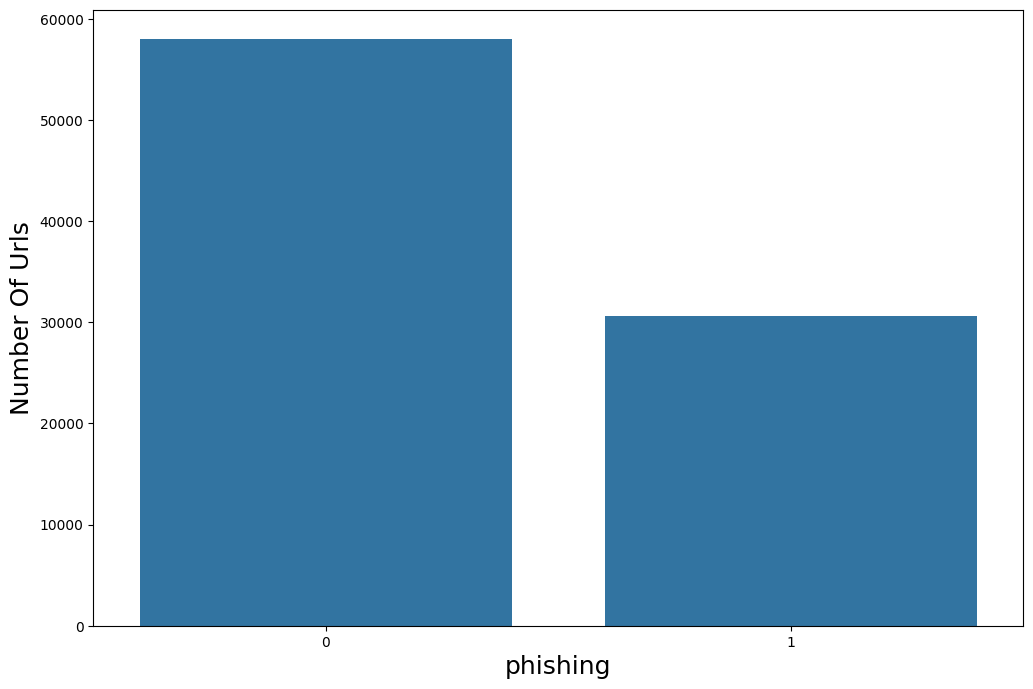

In [ ]:
# plotting distrubutions

from matplotlib import rcParams
features = list(urldata.columns)
rcParams['figure.figsize'] = 12,8

for i in features:
   sns.countplot(x=i,data=urldata)
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.show()

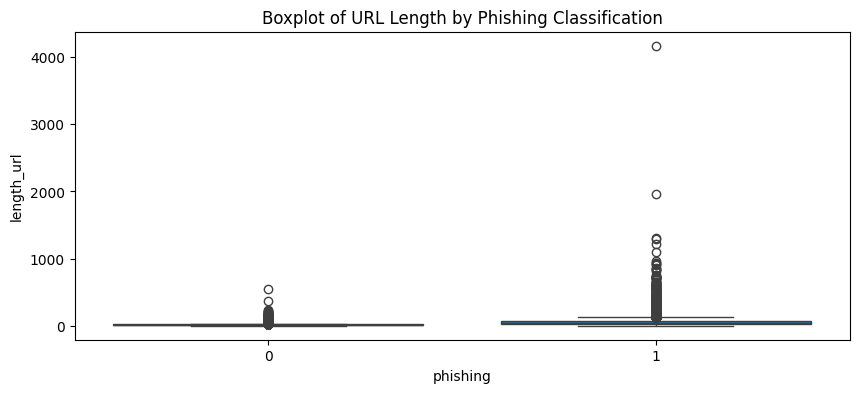

In [ ]:
# Visualization of phishing classification by URL length
plt.figure(figsize=(10, 4))
sns.boxplot(data=urldata, x='phishing', y='length_url')
plt.title('Boxplot of URL Length by Phishing Classification')
plt.show()

In [ ]:
# Determine number of phishing url's in dataset
phishing = urldata[urldata['phishing'] == 1]
valid = urldata[urldata['phishing'] == 0]
outlierFraction = len(phishing)/float(len(valid))
print(outlierFraction)
print('phishing url: {}'.format(len(urldata[urldata['phishing'] == 1])))
print('Valid url: {}'.format(len(urldata[urldata['phishing'] == 0])))

0.5283965517241379
phishing url: 30647
Valid url: 58000


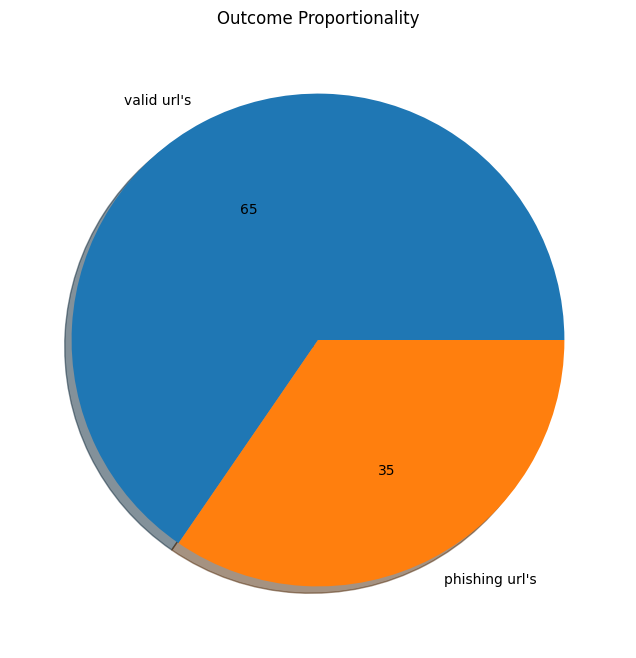

In [ ]:
plt.pie(urldata.phishing.value_counts(),
        labels= ["valid url's", "phishing url's"],
        autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()

Data Preprocessing



1.   handling missing values
1.   encoding
      --> lable encoding:converting non-numeric values into numeric values
2.   data spliting
      -->train data and test data




Data spliting

1.We'll follow a 80:20 ratio for data splitting,where we use 80% of data for training and 20% for testing.




In [ ]:
# Split features (X) and target variable (y)
X = urldata.drop('phishing', axis=1)
y = urldata['phishing']
print("Features and target variable separated!")

Features and target variable separated!


In [ ]:
X.head()

,length_url,qty_dot_url,qty_hyphen_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,email_in_url,domain_length,domain_in_ip,...,qty_slash_directory,file_length,qty_dot_file,qty_hyphen_file,params_length,qty_params,url_google_index,tls_ssl_certificate,qty_redirects,url_shortened
0,25,3,0,1,0,0,0,0,17,0,...,1,7,1,0,-1,-1,0,0,0,0
1,223,5,0,3,0,3,0,0,16,0,...,3,9,1,0,165,3,0,1,0,0
2,15,2,0,1,0,0,0,0,14,0,...,1,0,0,0,-1,-1,0,1,0,0
3,81,4,0,5,0,0,0,0,19,0,...,5,9,1,0,-1,-1,0,1,0,0
4,19,2,0,0,0,0,0,0,19,0,...,-1,-1,-1,-1,-1,-1,0,0,1,0


In [ ]:
y.head()

,phishing
0,1
1,1
2,0
3,1
4,0


In [ ]:
X.shape

(88647, 23)

In [ ]:
y.shape

(88647,)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split into training and testing sets!")
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)



Dataset split into training and testing sets!
Shape of x_train:  (70917, 23)
Shape of x_valid:  (17730, 23)
Shape of y_train:  (70917,)
Shape of y_valid:  (17730,)


In [ ]:
x_train

,length_url,qty_dot_url,qty_hyphen_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,email_in_url,domain_length,domain_in_ip,...,qty_slash_directory,file_length,qty_dot_file,qty_hyphen_file,params_length,qty_params,url_google_index,tls_ssl_certificate,qty_redirects,url_shortened
55124,21,2,0,0,0,0,0,0,21,0,...,-1,-1,-1,-1,-1,-1,0,0,0,0
44575,19,3,0,0,0,0,0,0,19,0,...,-1,-1,-1,-1,-1,-1,0,1,1,0
87793,43,2,0,0,0,0,0,0,43,0,...,-1,-1,-1,-1,-1,-1,0,1,0,0
5689,17,2,0,0,0,0,0,0,17,0,...,-1,-1,-1,-1,-1,-1,0,1,1,0
38932,23,2,0,0,0,0,0,0,23,0,...,-1,-1,-1,-1,-1,-1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,21,2,0,0,0,0,0,0,21,0,...,-1,-1,-1,-1,-1,-1,0,1,0,0
54886,25,3,0,1,0,0,0,0,17,0,...,1,7,1,0,-1,-1,0,0,2,0
76820,59,1,1,6,0,0,0,0,12,0,...,6,0,0,0,-1,-1,0,0,0,0
860,14,2,0,0,0,0,0,0,14,0,...,-1,-1,-1,-1,-1,-1,0,1,1,0


In [ ]:
y_train

,phishing
55124,0
44575,0
87793,0
5689,0
38932,0
...,...
6265,0
54886,1
76820,1
860,0



**Scale the features using MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)

In [ ]:
x_train

array([[0.00384615, 0.04347826, 0.        , ..., 0.        , 0.05555556,
        0.        ],
       [0.00336538, 0.08695652, 0.        , ..., 1.        , 0.11111111,
        0.        ],
       [0.00913462, 0.04347826, 0.        , ..., 1.        , 0.05555556,
        0.        ],
       ...,
       [0.01298077, 0.        , 0.02857143, ..., 0.        , 0.05555556,
        0.        ],
       [0.00216346, 0.04347826, 0.        , ..., 1.        , 0.11111111,
        0.        ],
       [0.00288462, 0.04347826, 0.        , ..., 0.        , 0.05555556,
        0.        ]])

**TRAINING MODELS**

**APPLY MACHINE LEARNING ALGORITHMS**

Logistic Regression  with Accuracy : 0.9022560631697688
Logistic Regression  with Precision : 0.9019513151744183
Logistic Regression  with Recall : 0.9022560631697688
Logistic Regression  with F1-score : 0.9020766919426297
Confusion matrix :  [[10792   820]
 [  913  5205]]
classification report :                precision    recall  f1-score   support

           0       0.92      0.93      0.93     11612
           1       0.86      0.85      0.86      6118

    accuracy                           0.90     17730
   macro avg       0.89      0.89      0.89     17730
weighted avg       0.90      0.90      0.90     17730



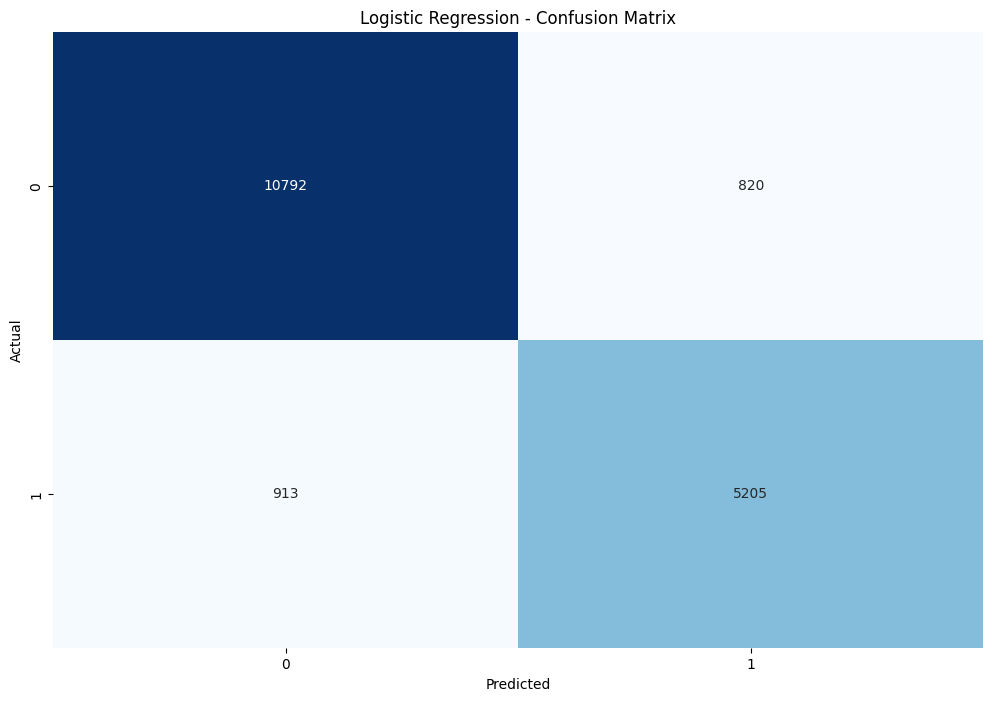

Naive Bayes  with Accuracy : 0.7914269599548788
Naive Bayes  with Precision : 0.8147720929234553
Naive Bayes  with Recall : 0.7914269599548788
Naive Bayes  with F1-score : 0.7682274323510159
Confusion matrix :  [[11317   295]
 [ 3403  2715]]
classification report :                precision    recall  f1-score   support

           0       0.77      0.97      0.86     11612
           1       0.90      0.44      0.59      6118

    accuracy                           0.79     17730
   macro avg       0.84      0.71      0.73     17730
weighted avg       0.81      0.79      0.77     17730



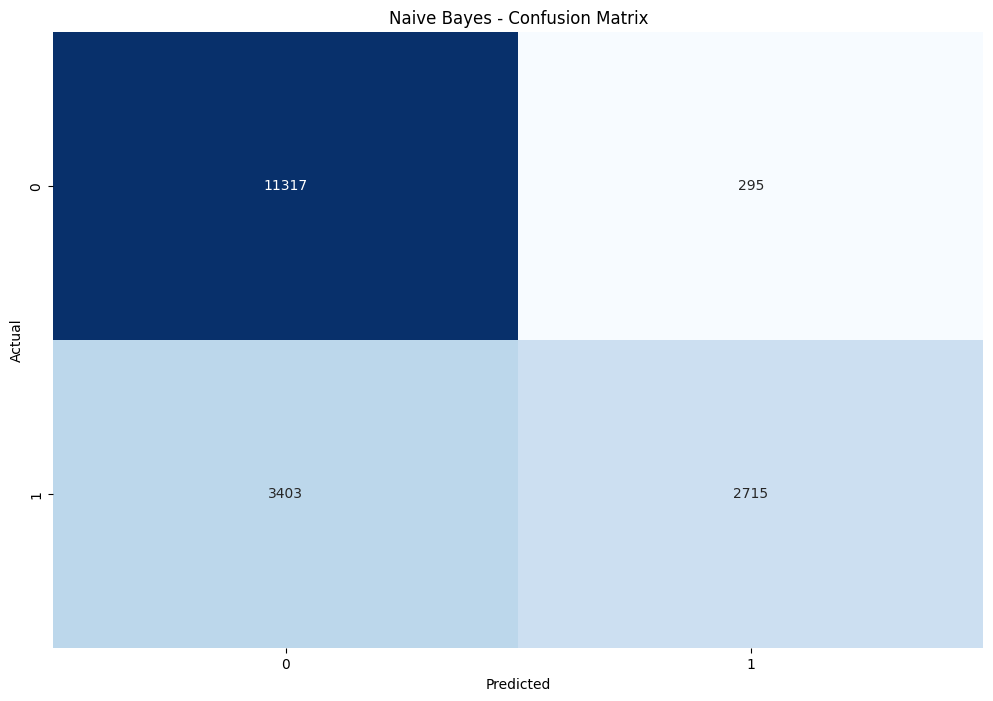

K-Nearest Neighbors  with Accuracy : 0.9276367738296672
K-Nearest Neighbors  with Precision : 0.9273333336318649
K-Nearest Neighbors  with Recall : 0.9276367738296672
K-Nearest Neighbors  with F1-score : 0.927394443668819
Confusion matrix :  [[11054   558]
 [  725  5393]]
classification report :                precision    recall  f1-score   support

           0       0.94      0.95      0.95     11612
           1       0.91      0.88      0.89      6118

    accuracy                           0.93     17730
   macro avg       0.92      0.92      0.92     17730
weighted avg       0.93      0.93      0.93     17730



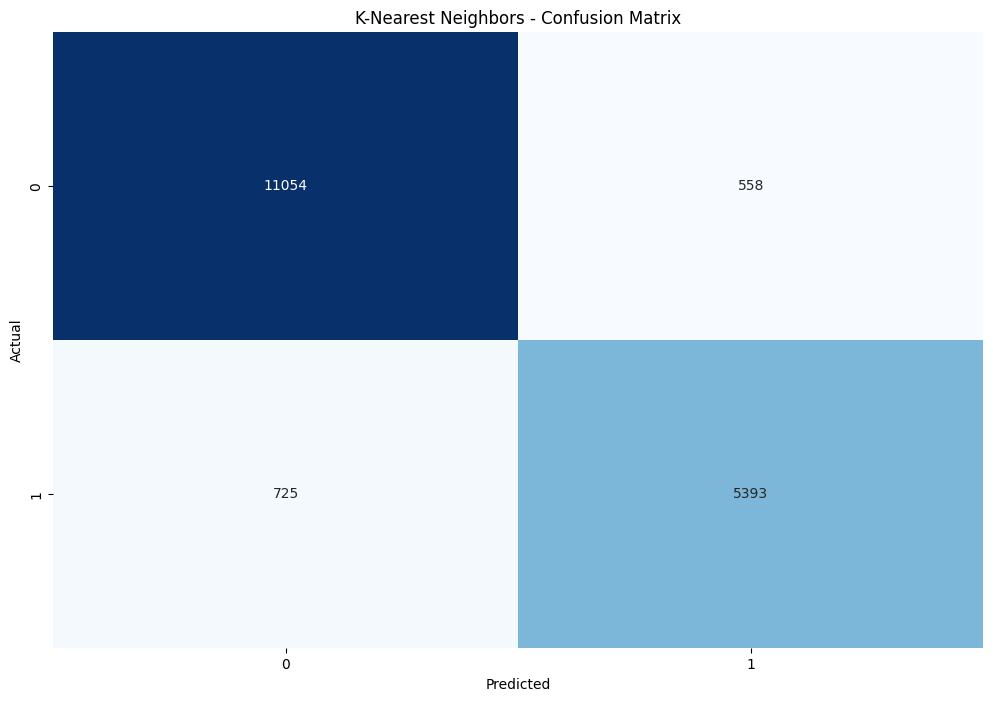

Decision Tree  with Accuracy : 0.9284827975183305
Decision Tree  with Precision : 0.9284533319282305
Decision Tree  with Recall : 0.9284827975183305
Decision Tree  with F1-score : 0.9278005435034108
Confusion matrix :  [[11202   410]
 [  858  5260]]
classification report :                precision    recall  f1-score   support

           0       0.93      0.96      0.95     11612
           1       0.93      0.86      0.89      6118

    accuracy                           0.93     17730
   macro avg       0.93      0.91      0.92     17730
weighted avg       0.93      0.93      0.93     17730



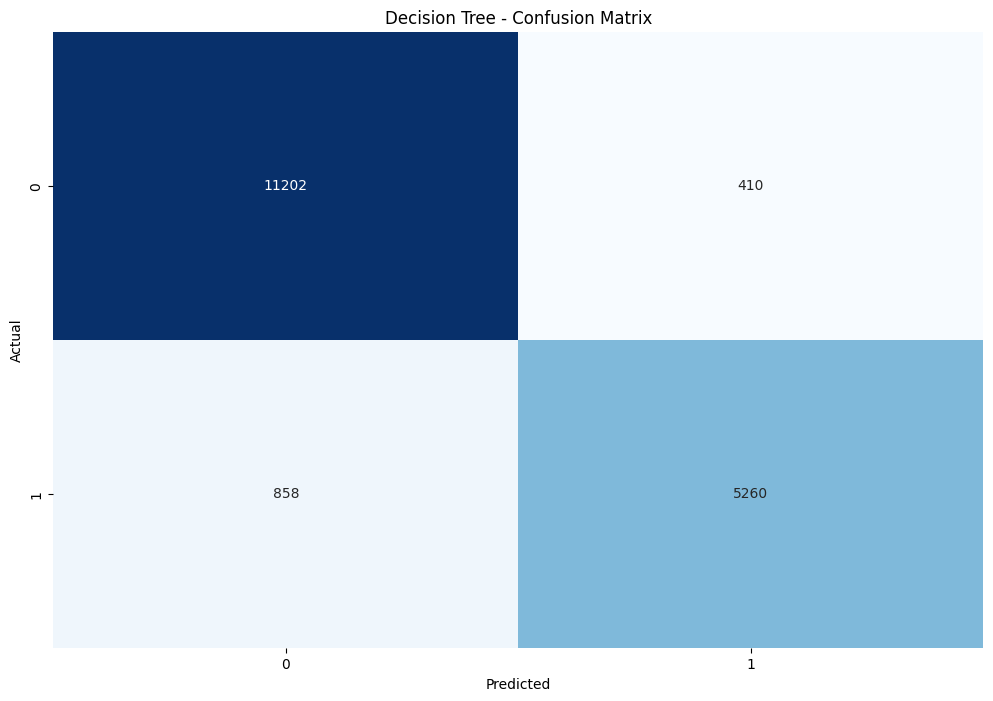

Random Forest  with Accuracy : 0.9400451212633953
Random Forest  with Precision : 0.9398250171840222
Random Forest  with Recall : 0.9400451212633953
Random Forest  with F1-score : 0.9398117759279006
Confusion matrix :  [[11177   435]
 [  628  5490]]
classification report :                precision    recall  f1-score   support

           0       0.95      0.96      0.95     11612
           1       0.93      0.90      0.91      6118

    accuracy                           0.94     17730
   macro avg       0.94      0.93      0.93     17730
weighted avg       0.94      0.94      0.94     17730



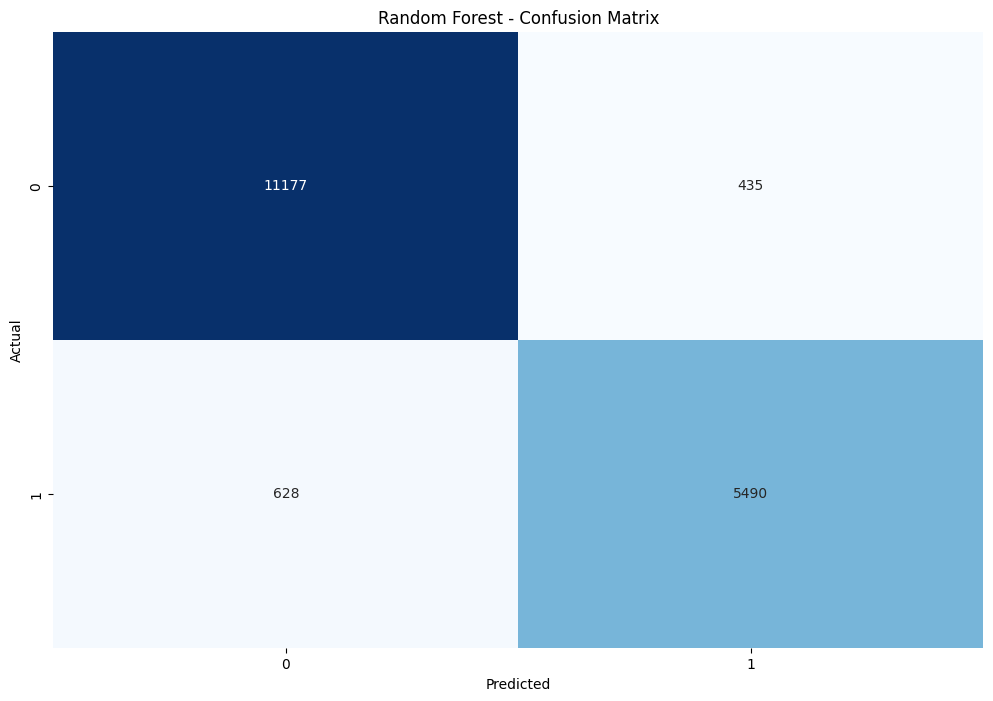

AdaBoost  with Accuracy : 0.9027636773829667
AdaBoost  with Precision : 0.9041907777643023
AdaBoost  with Recall : 0.9027636773829667
AdaBoost  with F1-score : 0.9032480834703415
Confusion matrix :  [[10613   999]
 [  725  5393]]
classification report :                precision    recall  f1-score   support

           0       0.94      0.91      0.92     11612
           1       0.84      0.88      0.86      6118

    accuracy                           0.90     17730
   macro avg       0.89      0.90      0.89     17730
weighted avg       0.90      0.90      0.90     17730



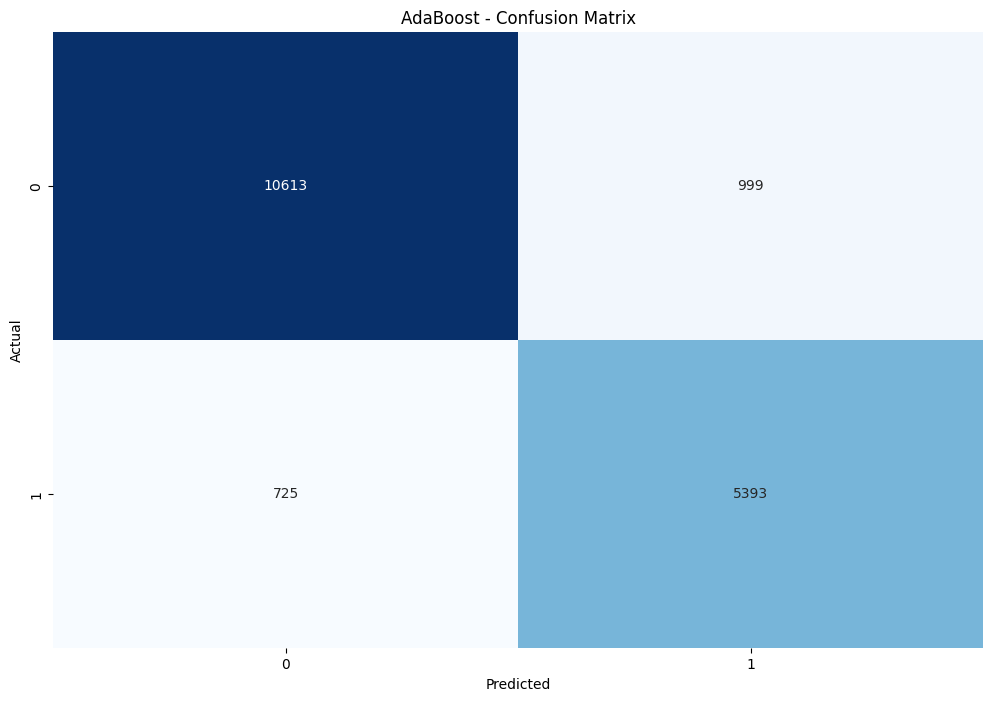

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
}

# Store accuracies for the bar graph
metrics = {}


for name, model in models.items():
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    cm=confusion_matrix(y_test,ypred)

    accuracy = accuracy_score(y_test, ypred)
    precision = precision_score(y_test, ypred, average='weighted')
    recall = recall_score(y_test, ypred, average='weighted')
    f1 = f1_score(y_test, ypred, average='weighted')
    metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

    print(f"{name}  with Accuracy : {accuracy}")
    print(f"{name}  with Precision : {precision}")
    print(f"{name}  with Recall : {recall}")
    print(f"{name}  with F1-score : {f1}")

    print("Confusion matrix : ",cm)
    print("classification report : ",classification_report(y_test,ypred))

    # Plot heatmap for each model
    sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()  # Ensures a new plot is shown for each model
    print("==========================================================")



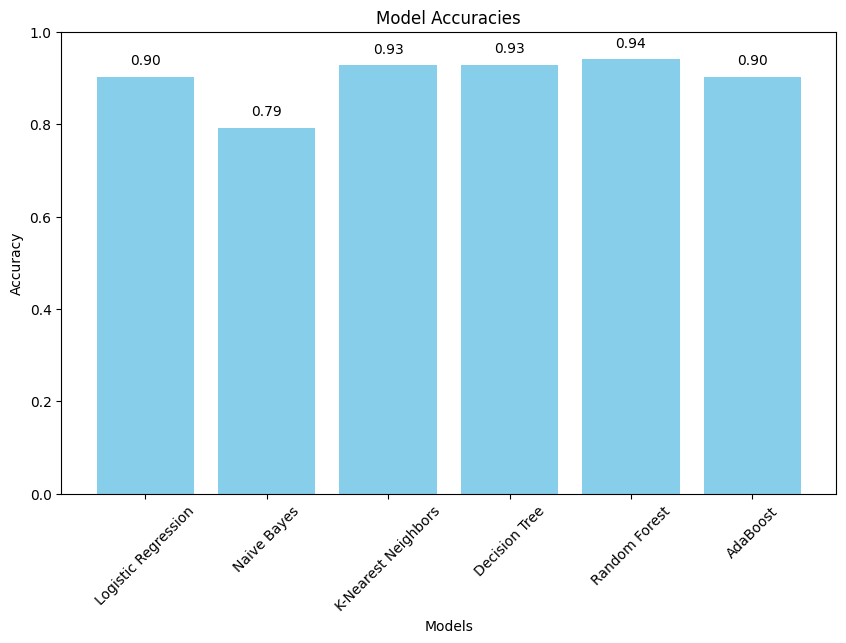

In [ ]:
# Plot bar graph of all accuracies
plt.figure(figsize=(10, 6))
accuracies=[value['Accuracy'] for value in metrics.values()]
plt.bar(metrics.keys(), accuracies, color='skyblue')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
# Display accuracy on each bar
for i, (model, acc) in enumerate(metrics.items()):
    plt.text(i, acc['Accuracy'] + 0.02, f"{acc['Accuracy']:.2f}", ha='center', va='bottom')

plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(x_train, y_train)
bagging_pred = bagging_model.predict(x_test)

In [ ]:
# Define Threshold (Majority Voting)
threshold = 0.6

all_model_preds = []
for name, model in models.items():
    all_model_preds.append(model.predict(x_test))
all_model_preds = np.array(all_model_preds)
final_pred = (np.mean(all_model_preds, axis=0) >= threshold).astype(int)

In [ ]:
# Evaluate Final Model
final_accuracy = accuracy_score(y_test, bagging_pred)
print(f"Final Bagging Model Accuracy: {final_accuracy * 100:.2f}%")

Final Bagging Model Accuracy: 93.95%


In [ ]:
import pickle
import os

# Check if the 'pickle' directory exists, and create it if it doesn't
pickle_dir = 'pickle'
if not os.path.exists(pickle_dir):
    os.makedirs(pickle_dir)

# dump information to that file
pickle.dump(bagging_model, open('pickle/model.pkl', 'wb'))
print(f"pickle file created")

pickle file created
